# Perceptions of Crime in Gauteng

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
#import household data
data = pd.read_csv("../data/raw/VOCS2016-2017-HOUSEHOLD_F1.csv")
data.head()


,uqno,prov,Q21topiccrime,Q21bHowLong,Q2211Murder,Q2212StrRob,Q2213HomeRob,Q2214BussRob,Q2215Hijack,Q2216Assault,...,Q2012Who,Q2013Recovered,Q2014Secure,Q2015Measures,Q2015Awareness,Q2015Gun,Q2015Weapon,Q2015Other,metro_code,Unnamed: 674
0,160100720000002601,1,2,3,2,2,2,2,2,1,...,9,9,9,9,9,9,9,9,1,NaN
1,160100720000006301,1,2,2,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,1,NaN
2,160100720000010001,1,2,1,2,2,2,2,2,2,...,9,9,9,9,9,9,9,9,1,NaN
3,160101220000003001,1,2,3,2,2,2,2,2,1,...,9,9,9,9,9,9,9,9,1,NaN
4,160101220000006301,1,2,3,2,2,2,2,2,1,...,9,9,9,9,9,9,9,9,1,NaN


Check data for problems:

In [7]:
#get overview of data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21095 entries, 0 to 21094
Columns: 675 entries, uqno to Unnamed: 674
dtypes: float64(1), int64(674)
memory usage: 108.6 MB


In [50]:
#get gauteng only
gauteng = data[data['prov'] == 7]
gauteng.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5243 entries, 11815 to 17057
Columns: 675 entries, uqno to Unnamed: 674
dtypes: float64(1), int64(674)
memory usage: 27.0 MB


5243

In [9]:
#get metros: check - is it the right metro codes? right number of respondents by metro?
metro = gauteng.groupby('metro_code') .size()
metro

metro_code
12     867
13    1389
14    1847
15    1140
dtype: int64

These metro codes correspond to those in the StatsSA documentation. Next, are there missing values?

In [10]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
#check for missing values in data
missing_values_table(gauteng)

Your selected dataframe has 675 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Unnamed: 674,5243,100.0


In [12]:
#remove unnamed column
gauteng = gauteng.drop(labels='Unnamed: 674', axis=1)

This Unnamed column contains no data, we can drop it from the data frame later. Alternatively, you can also find missing values in the following way:

In [13]:
#different way to check missing values
mis_val = (gauteng.isnull()
           .sum() 
           .reset_index() 
           .rename(columns={'index': 'Variable', 0: 'Missingfreq'}) 
           .sort_values('Missingfreq', ascending=False)
          .head())

mis_val

,Variable,Missingfreq
0,uqno,0
452,Q16a2b3Metal,0
444,Q15163CarryGun,0
445,Q15164CaryWeapon,0
446,Q15165Other,0


There are no missing values in the data (ignoring 'unnamed')

## What do people perceive as the most frequently occuring crimes in their area?

Get crime perceptions only

In [14]:
#get perceptions only
mostcrime = gauteng.iloc[:,4:27]
mostcrime.head()

,Q2211Murder,Q2212StrRob,Q2213HomeRob,Q2214BussRob,Q2215Hijack,Q2216Assault,Q2217SexAssult,Q2218ChildAbuse,Q2219Political,Q22110Vigilante,...,Q22114Burglary,Q22115Crop,Q22116Livestock,Q22117WhiteCollar,Q22118damage,Q22119IDtheft,Q22120HumanTrafficking,Q22121DrugTrafficking,Q22122HateCrime,Q22123Other
11815,1,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
11816,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
11817,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
11818,2,1,2,2,2,2,1,2,2,2,...,1,2,2,2,2,2,2,2,2,2
11819,2,2,1,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [70]:
#Get responses into workable format:
#for every column:
#    sum yes (1) responses 

#define codes
occur_codes = ["Q2211Murder", "Q2212StrRob", "Q2213HomeRob", "Q2214BussRob", "Q2215Hijack", "Q2216Assault", "Q2217SexAssult", 
            "Q2218ChildAbuse", "Q2219Political", "Q22110Vigilante", "Q22111BagSnatch", 
            "Q22112Bicycle", "Q22113Car", "Q22114Burglary", "Q22115Crop", "Q22116Livestock", "Q22117WhiteCollar", "Q22118damage", 
            "Q22119IDtheft", "Q22120HumanTrafficking", "Q22121DrugTrafficking", "Q22122HateCrime", "Q22123Other"]
crime_labels = ["Murder", "Street Robbery", "Home Roberry", "Business Robbery","Vehicle Hijacking", "Assault", "Sexual Assault", 
          "Child Abuse", "Political Violence", "Vigilantism", "Bag Snatching", "Bicycle Theft", "Vehicle Theft", "House Breaking", 
          "Crop Theft", "Livestock Theft", "White Collar", "Damage", "Id theft", "Human Trafficking", "Drug Trafficking",
          "Hate Crime", "Other Crime"]

def freqCount(region, topic_code, response_code):
    return region.groupby(topic_code).size().reset_index(name = 'frequency')['frequency'][response_code]

def multiFreqCount(region, occur_codes):
    #create list of counts
    crime_count = []
    for topic in occur_codes:
        crime_count.append(freqCount(region, topic, 0))
    
    #create list of topics
    label = []
    for topic in occur_codes:
        label.append(topic)
     
    #gather lists to data frame using numpy
    countdata = pd.DataFrame(
    {'CrimeCode': label,
    'Frequency': crime_count}
    )
       
    return countdata


gautengdata = multiFreqCount(gauteng, occur_codes)
gautengdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
CrimeCode    23 non-null object
Frequency    23 non-null int64
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [71]:
#add label for crime type
gautengdata['CrimeType'] = crime_labels

#calculate percentage, assuming all indetermined answers count as 'no'
gautengdata['Percentage'] = round(gautengdata.Frequency/len(gauteng)*100, 0)
gautengdata

,CrimeCode,Frequency,CrimeType,Percentage
0,Q2211Murder,796,Murder,15.0
1,Q2212StrRob,2475,Street Robbery,47.0
2,Q2213HomeRob,1893,Home Roberry,36.0
3,Q2214BussRob,977,Business Robbery,19.0
4,Q2215Hijack,927,Vehicle Hijacking,18.0
5,Q2216Assault,666,Assault,13.0
6,Q2217SexAssult,368,Sexual Assault,7.0
7,Q2218ChildAbuse,182,Child Abuse,3.0
8,Q2219Political,388,Political Violence,7.0
9,Q22110Vigilante,329,Vigilantism,6.0


In [80]:
#Get most frequently occuring crimes:    
#get table of percentages and sort descending order    
gautengdata = gautengdata.sort_values('Percentage', ascending=False)

#print 5 most common crimes 
gautengdata.iloc[0:5,1:4]

,Frequency,CrimeType,Percentage
13,3022,House Breaking,58.0
1,2475,Street Robbery,47.0
2,1893,Home Roberry,36.0
10,1176,Bag Snatching,22.0
3,977,Business Robbery,19.0


The most frequently occuring crimes are house breaking, street robbery, home robbert, bag snatching and business robbery.

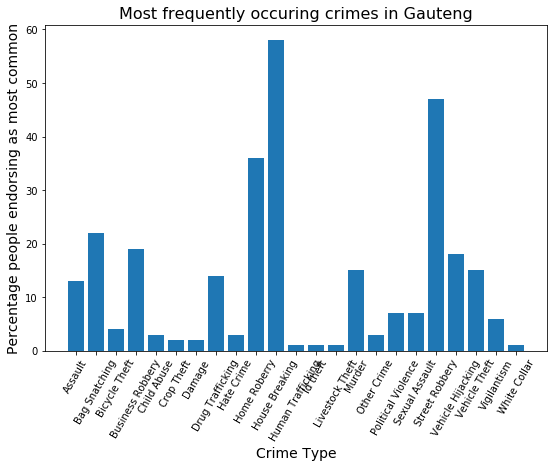

In [98]:
plt.bar(gautengdata.CrimeType, gautengdata.Percentage)
plt.title("Most frequently occuring crimes in Gauteng", fontsize = 16)
plt.xlabel("Crime Type", fontsize = 14)
plt.xticks(rotation = 60)
plt.ylabel("Percentage people endorsing as most common", fontsize = 14)
plt.rcParams['figure.figsize'] = [9, 6]
plt.show()

Is this what you would expect? Repeat for each metro - do the top 5 crimes differ be metro? 

In [3]:
# can you wrap the commands above in a function to repeat for each metro?

# What are the most feared crimes in Gauteng?
Does this differ by metro?